In [1]:
import pandas as pd

MIN = 6
MAX = 7
MEAN = 8

df = pd.read_csv('experiments/project final-parameter-search-spreadsheet.csv', skiprows=6)

/var/folders/7k/4t2z30_91ln7l92nmzld1bl00000gn/T/ipykernel_9362/478896180.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

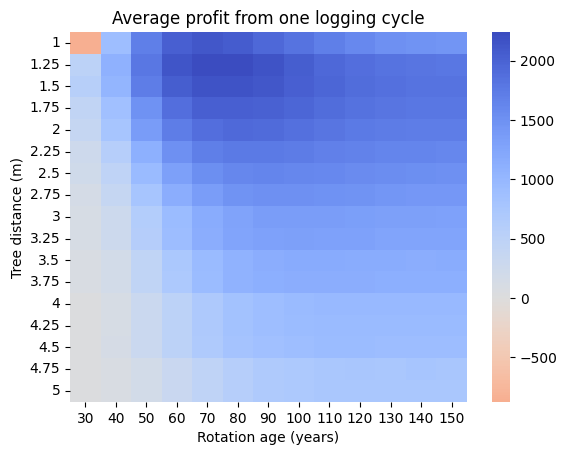

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_profit_heatmap = pd.DataFrame()
for run in filter(lambda x: x.find('.') == -1, df.columns[1:]):
    mean_profit_heatmap.at[df[run][1], df[run][0]] = float(df[run][MEAN])


sns.heatmap(mean_profit_heatmap, center=0, cmap=sns.color_palette('coolwarm', as_cmap=True).reversed())
plt.title('Average profit from one logging cycle')
plt.xlabel('Rotation age (years)')
plt.ylabel('Tree distance (m)')
plt.show()

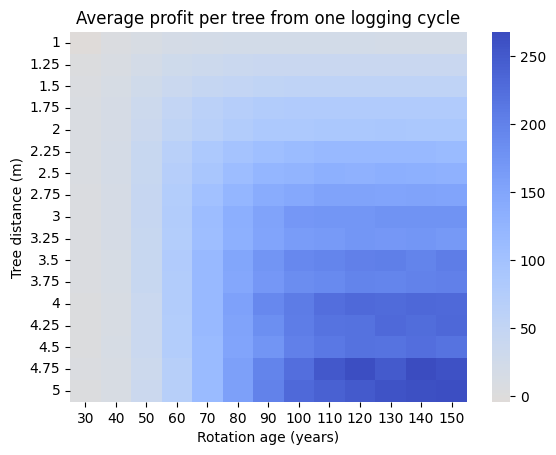

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mean_tree_profit_heatmap = pd.DataFrame()
for run in filter(lambda x: x.find('.') == -1, df.columns[1:]):
    mean_tree_profit_heatmap.at[df[run][1], df[run][0]] = float(df[f'{run}.2'][MEAN])

sns.heatmap(mean_tree_profit_heatmap, center=0, cmap=sns.color_palette('coolwarm', as_cmap=True).reversed())
plt.title('Average profit per tree from one logging cycle')
plt.xlabel('Rotation age (years)')
plt.ylabel('Tree distance (m)')
plt.show()

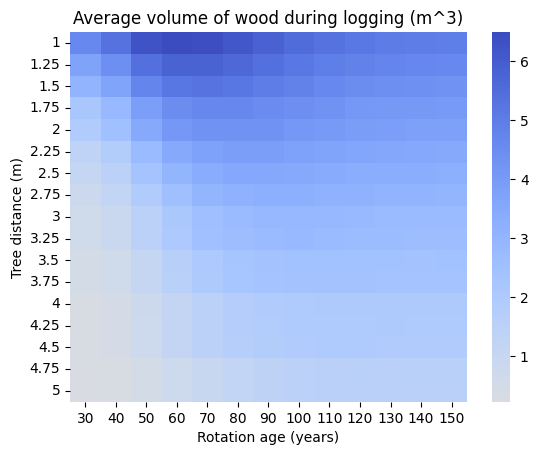

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


mean_tree_profit_heatmap = pd.DataFrame()
for run in filter(lambda x: x.find('.') == -1, df.columns[1:]):
    mean_tree_profit_heatmap.at[df[run][1], df[run][0]] = float(df[f'{run}.1'][MEAN])

sns.heatmap(mean_tree_profit_heatmap, center=0, cmap=sns.color_palette('coolwarm', as_cmap=True).reversed())
plt.title('Average volume of wood during logging (m^3)')
plt.xlabel('Rotation age (years)')
plt.ylabel('Tree distance (m)')
plt.show()

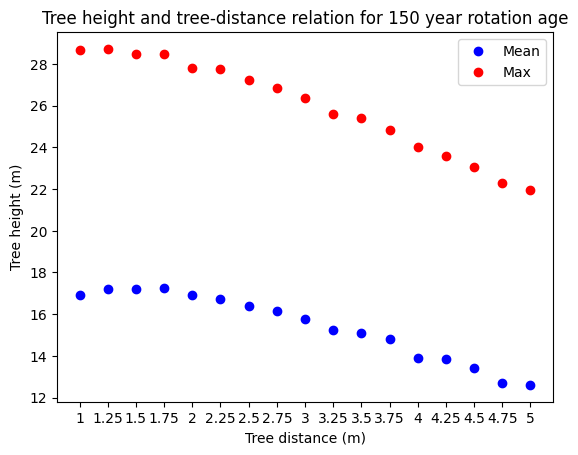

In [13]:
import matplotlib.pyplot as plt


def run_filter(x):
    return x.find('.') == -1 and df[x][0] == '150'


tree_distance_height_relation = pd.DataFrame()
for run in filter(run_filter, df.columns[1:]):
    tree_distance_height_relation.at['mean', df[run][1]] = float(df[f'{run}.10'][MEAN])
    tree_distance_height_relation.at['max', df[run][1]] = float(df[f'{run}.11'][MEAN])



plt.plot(tree_distance_height_relation.loc['mean'], 'bo')
plt.plot(tree_distance_height_relation.loc['max'], 'ro')

plt.title('Tree height and tree-distance relation for 150 year rotation age')
plt.xlabel('Tree distance (m)')
plt.ylabel('Tree height (m)')

plt.legend(['Mean', 'Max'])


plt.show()

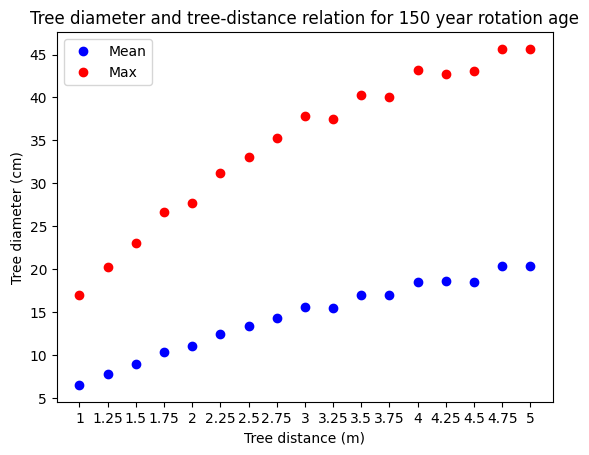

In [14]:
import matplotlib.pyplot as plt


def run_filter(x):
    return x.find('.') == -1 and df[x][0] == '150'


tree_distance_diameter_relation = pd.DataFrame()
for run in filter(run_filter, df.columns[1:]):
    tree_distance_diameter_relation.at['mean', df[run][1]] = float(df[f'{run}.8'][MEAN]) * 100
    tree_distance_diameter_relation.at['max', df[run][1]] = float(df[f'{run}.9'][MEAN]) * 100


plt.plot(tree_distance_diameter_relation.loc['mean'], 'bo')
plt.plot(tree_distance_diameter_relation.loc['max'], 'ro')

plt.title('Tree diameter and tree-distance relation for 150 year rotation age')
plt.xlabel('Tree distance (m)')
plt.ylabel('Tree diameter (cm)')
plt.legend(['Mean', 'Max'])
plt.show()

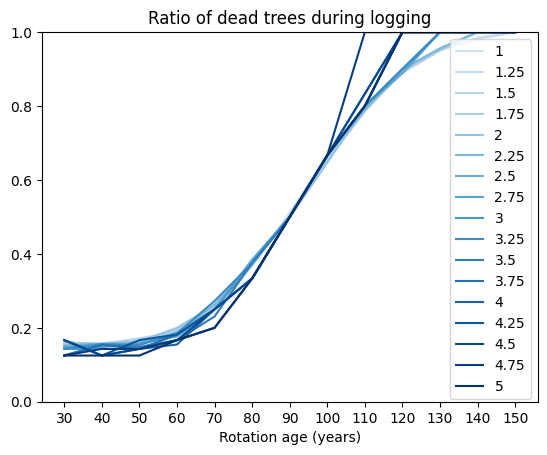

In [20]:
import matplotlib.pyplot as plt
import numpy as np


dead_trees = pd.DataFrame()
for run in filter(lambda x: x.find('.') == -1, df.columns[1:]):
    dead_trees.at[df[run][0], df[run][1]] = df[f'{run}.4'][12:].astype(float).median()


values = np.linspace(0.2, 1, len(dead_trees.columns))


for i, col in enumerate(dead_trees.columns):
    plt.plot(dead_trees[col], label=col, color=plt.cm.Blues(values[i]))

plt.title('Ratio of dead trees during logging')
plt.xlabel('Rotation age (years)')


plt.ylim(0, 1)

plt.legend()
plt.show()

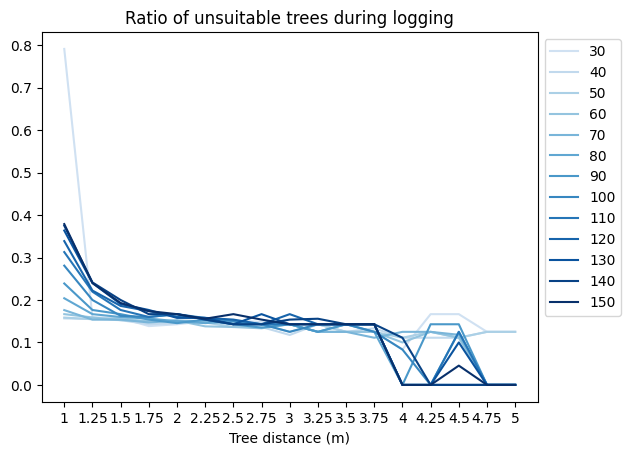

In [28]:
import matplotlib.pyplot as plt
import numpy as np


unsuitable_trees = pd.DataFrame()
for run in filter(lambda x: x.find('.') == -1, df.columns[1:]):
    unsuitable_trees.at[df[run][1], df[run][0]] = df[f'{run}.5'][12:].astype(float).median()


values = np.linspace(0.2, 1, len(unsuitable_trees.columns))


for i, col in enumerate(unsuitable_trees.columns):
    plt.plot(unsuitable_trees[col], label=col, color=plt.cm.Blues(values[i]))

plt.title('Ratio of unsuitable trees during logging')
plt.xlabel('Tree distance (m)')


plt.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

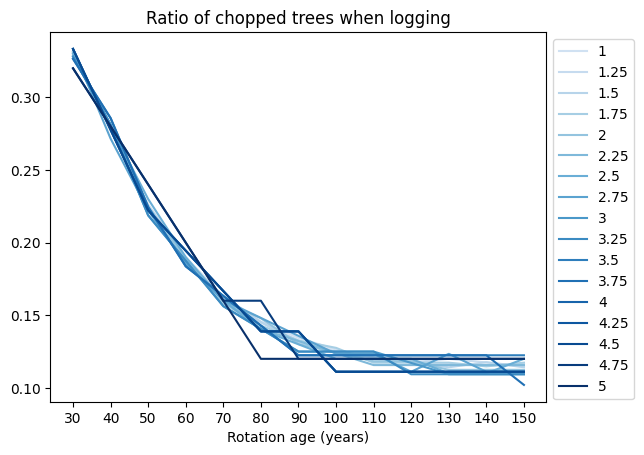

In [21]:
import matplotlib.pyplot as plt



unsuitable_trees = pd.DataFrame()
for run in filter(lambda x: x.find('.') == -1, df.columns[1:]):
    unsuitable_trees.at[df[run][0], df[run][1]] = df[f'{run}.3'][12:].astype(float).median()


values = np.linspace(0.2, 1, len(unsuitable_trees.columns))


for i, col in enumerate(unsuitable_trees.columns):
    plt.plot(unsuitable_trees[col], label=col, color=plt.cm.Blues(values[i]))


plt.title('Ratio of chopped trees when logging')
plt.xlabel('Rotation age (years)')

plt.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()